# Training Image Classification

In [195]:
# Load modules
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

%matplotlib inline

mpl.rcParams['figure.figsize'] = (15,15)

img_orig = plt.imread('images-for-training\\01 original.jpg')
img_anal = plt.imread('images-for-training\\01 analyzed.jpg')

print (img_orig.shape)
print (img_anal.shape)

(3500, 1640, 3)
(799, 405, 3)


# Helper Routines

In [196]:
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def colorspace(img, csp=0):
    colorspaces = (cv2.COLOR_RGB2HSV,
                   cv2.COLOR_RGB2BGR,
                   cv2.COLOR_RGB2YCrCb,
                   cv2.COLOR_RGB2LAB,                 
                   )
    return cv2.cvtColor(img, colorspaces[csp])

def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def weighted_img(img_a, img_b, α=0.8, β=1., λ=0., xoff = 0, y0ff = 0):
    """
    TODO: X and Y offset not yet enabled
    The result image is computed as follows:

    img_a * α + img_b * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    assert(img_a.shape==img_b.shape)
    return cv2.addWeighted(img_a, α, img_b, β, λ)

def overlay_img(img_a, img_b, xoff = 0, yoff = 0):
    """Just add img_a and img_b together (they should have the same number of channels)
    TODO: X and Y offset not yet enabled
    """
    assert(img_a.shape==img_b.shape)
    np.add(img_a, img_b, out=img_c)
    
    return img_c

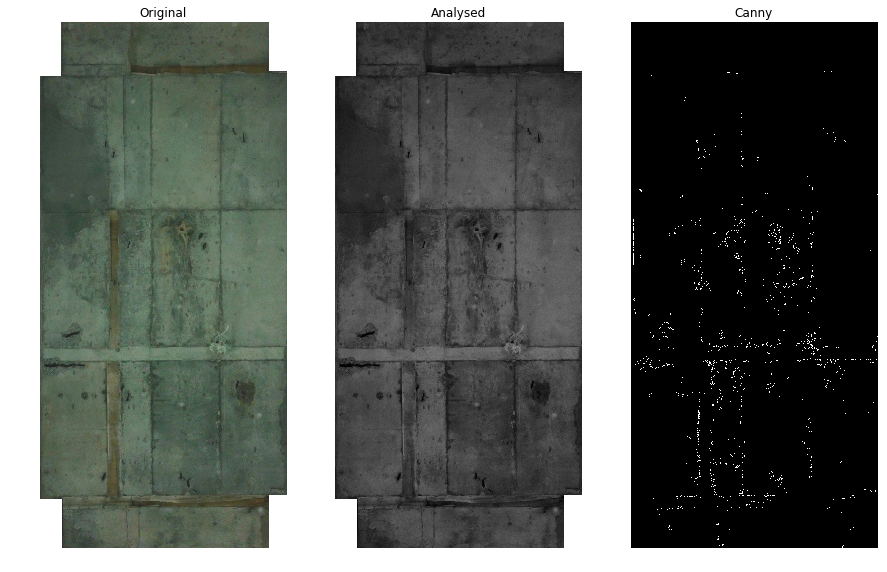

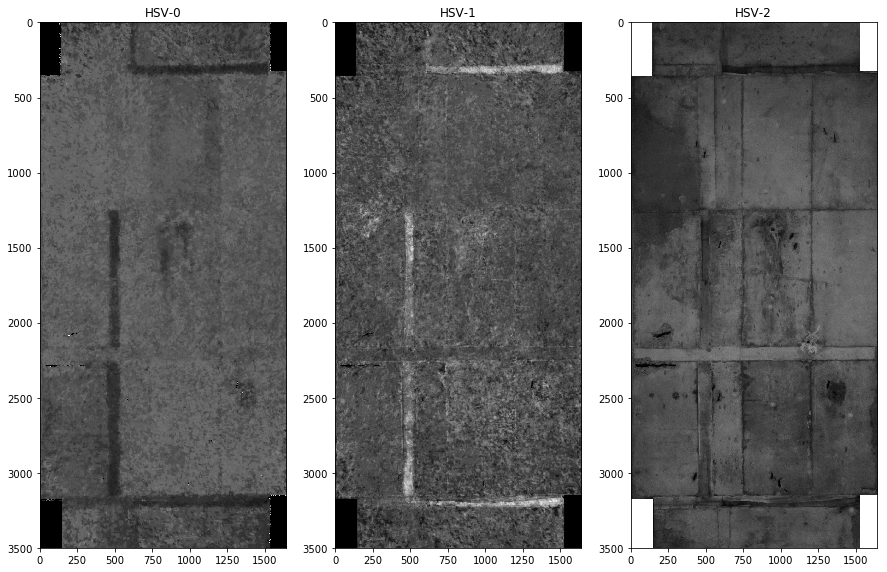

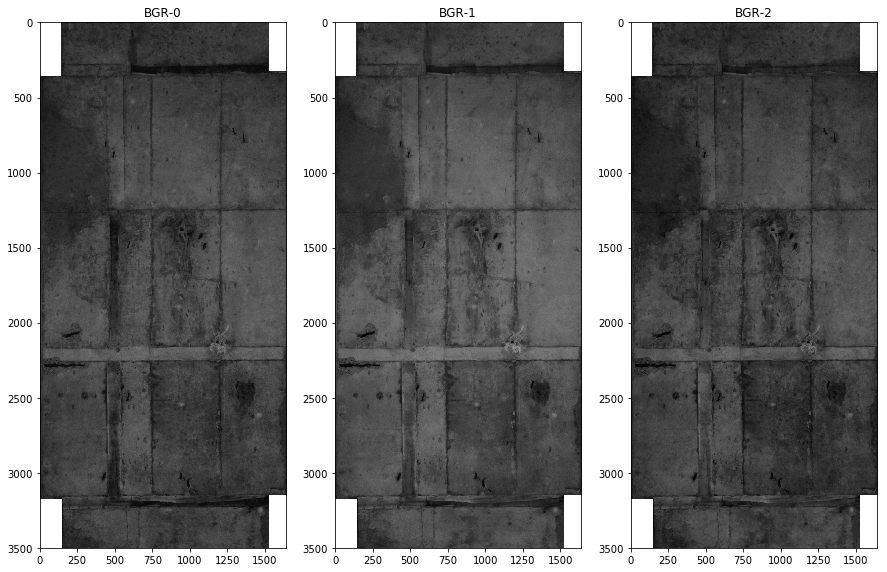

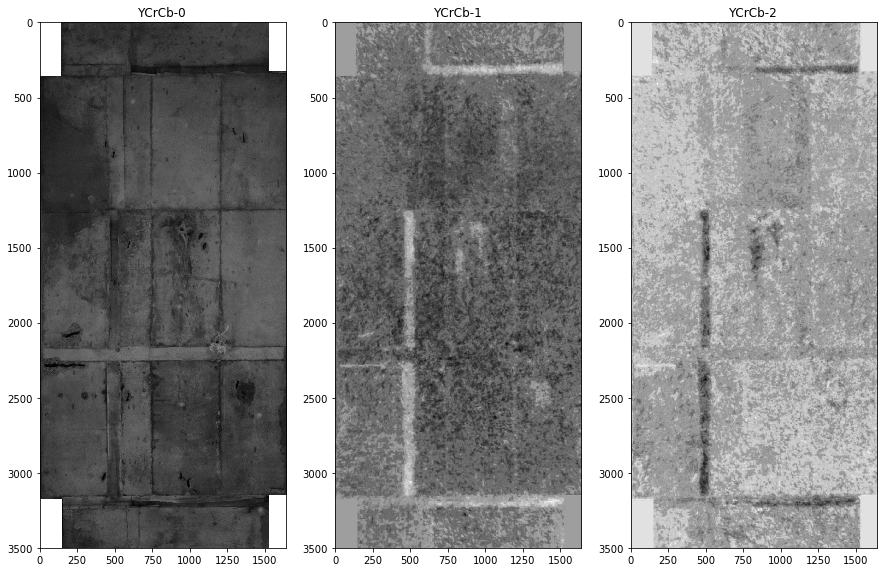

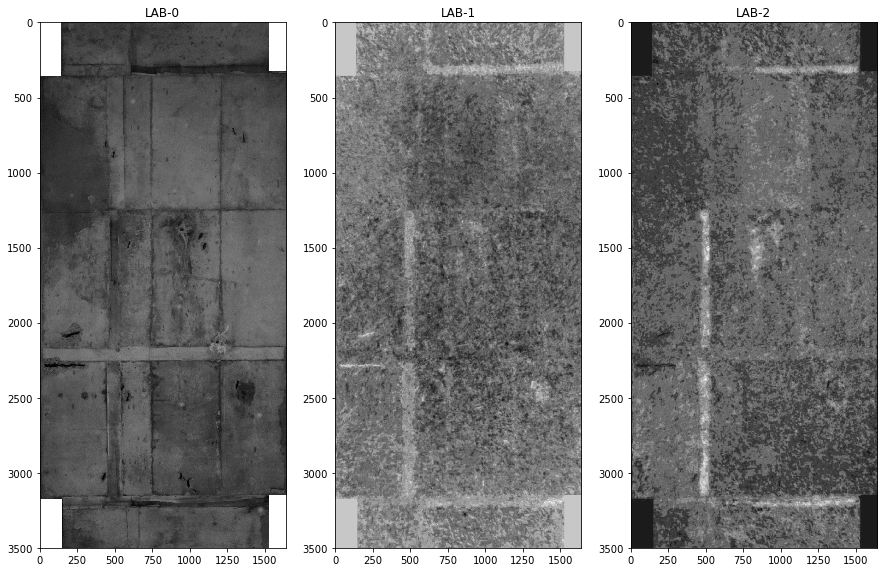

In [198]:
# Original Image
img_orig_rgba = cv2.cvtColor(img_orig, cv2.COLOR_RGB2RGBA)

## Subselect rectangle
x1, y1, x2, y2 = 20, 5, 380, 779
img_anal_sub = img_anal[:, x1:x2, :]

## Convert to RGBA
img_anal_rgba = cv2.cvtColor(img_anal_sub, cv2.COLOR_RGB2RGBA)

## Remove white pixels
threshold = 200
h, w = img_anal_rgba.shape[0], img_anal_rgba.shape[1]
for i in range(h):
    for j in range(w):
        if img_anal_rgba[i,j,0] >= threshold and \
           img_anal_rgba[i,j,2] >= threshold and \
           img_anal_rgba[i,j,2] >= threshold:
            img_anal_rgba[i,j,3] = 0

## Resize to original image size
img_anal_resize = cv2.resize(img_anal_rgba, 
                             (img_orig.shape[1], img_orig.shape[0]), 
                             interpolation=cv2.INTER_CUBIC)


# Composite Image
img_c = weighted_img(img_orig_rgba, img_anal_resize, α=1.0, β=0.5, λ=0.)

# Direct overlay
img_c1 = overlay_img(img_orig_rgba, img_anal_resize)

# Canny Image
img_gray = grayscale(img_orig)
img_blur = gaussian_blur(img_gray,3)
low_thres = 20
high_thres = 80
img_canny = canny(img_blur, low_thres, high_thres)

# Colorspace
colorspaces = ('HSV',
               'BGR',
               'YCrCb',
               'LAB')
csp = 3
dim = 0
img_csp = colorspace(img_orig, csp)

# Plot
plt.figure()
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(img_orig_rgba)
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Analysed')
#plt.imshow(img_anal_resize)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_canny,cmap='gray')
plt.title('Canny')
plt.axis('off')

#print(img_canny.min(), img_canny.max(), img_canny.shape)

for csp in range(len(colorspaces)):
    plt.figure()
    img_new = colorspace(img_orig, csp)
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.imshow(img_new[:,:,i],cmap='gray')
        plt.title("{}-{}".format(colorspaces[csp],i))